<a href="https://colab.research.google.com/github/raniabaadj/Our-approach/blob/main/rania_souad_approach_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sys

import tensorflow.keras
import tensorflow as tf

print(f"Tensor Flow Version: {tf.__version__}")
print(f"Keras Version: {tensorflow.keras.__version__}")
print(f"Python {sys.version}")
print("GPU is", "available" if tf.test.is_gpu_available() else "NOT AVAILABLE")
print(tf.config.list_physical_devices('GPU'))

Tensor Flow Version: 2.10.1
Keras Version: 2.10.0
Python 3.8.20 (default, Oct  3 2024, 15:19:54) [MSC v.1929 64 bit (AMD64)]
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
GPU is available
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [ ]:
import tensorflow as tf
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set path to the dataset

data_dir = r"C:\Users\LIMLab\Downloads\archive\chest_xray"


In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_dir = r"C:\Users\LIMLab\Downloads\archive\chest_xray\train"
val_dir = r"C:\Users\LIMLab\Downloads\archive\chest_xray\val"
test_dir = r"C:\Users\LIMLab\Downloads\archive\chest_xray\test"

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Préparation des générateurs d'images
train_datagen = ImageDataGenerator(
    rescale=1./255,
    zoom_range=0.2,
    horizontal_flip=True
)

In [ ]:
# Créer les datasets
train_generator = train_datagen.flow_from_directory(
    directory=train_dir,
    target_size=(224, 224),
    batch_size=8,
    class_mode='binary'
)

Found 5216 images belonging to 2 classes.


In [ ]:
val_generator = val_datagen.flow_from_directory(
    directory=val_dir,
    target_size=(224, 224),
    batch_size=8,
    class_mode='binary'
)

Found 16 images belonging to 2 classes.


In [ ]:
test_generator = test_datagen.flow_from_directory(
    directory=test_dir,
    target_size=(224, 224),
    batch_size=8,
    class_mode='binary',

)

Found 624 images belonging to 2 classes.


In [ ]:
from tensorflow.keras import layers, models
from tensorflow.keras.applications import DenseNet201
# Modèle basé sur DenseNet121
base_model = DenseNet201(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

inputs = tf.keras.Input(shape=(224, 224, 3))
x = base_model(inputs, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(inputs, outputs)

# Compilation
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)


model.summary()



# Entraînement très limité pour tester la stabilité
history = model.fit(train_generator,
                    epochs=100,
                   validation_data = test_generator
                )

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 densenet201 (Functional)    (None, 7, 7, 1920)        18321984  
                                                                 
 global_average_pooling2d (G  (None, 1920)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 256)               491776    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                             

In [ ]:
!pip install matplotlib

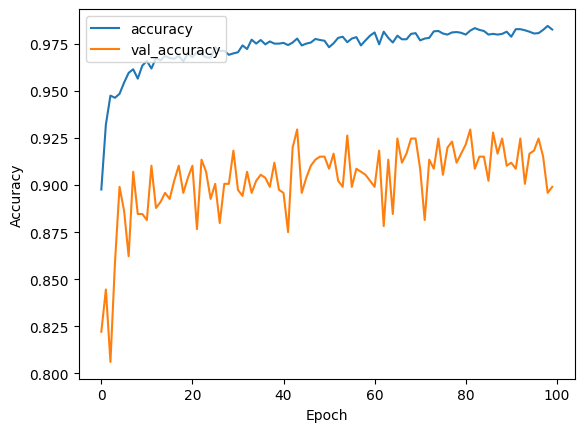

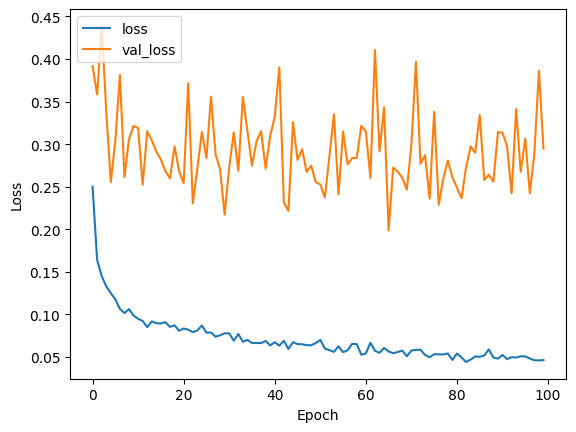

In [ ]:
import matplotlib.pyplot as plt

# Courbes d'entraînement
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.show()

# Courbes de perte
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')
plt.show()

In [ ]:
model.save('model.h5')

In [ ]:
import os
print(os.listdir(r"C:\Users\LIMLab\Downloads\archive\chest_xray\train"))  # Doit afficher ['NORMAL', 'PNEUMONIA']


['NORMAL', 'PNEUMONIA']


In [ ]:
#VGG16 MODEL
# Charger VGG16 sans la top layer
from tensorflow.keras import layers, models
from tensorflow.keras.applications import VGG16
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

# Construire le modèle avec API fonctionnelle
inputs = tf.keras.Input(shape=(224, 224, 3))
x = base_model(inputs, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation='sigmoid')(x)

modelvgg16 = models.Model(inputs, outputs)

# Compiler
modelvgg16.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

modelvgg16.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_average_pooling2d_1   (None, 512)              0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 257       
                                                           

In [ ]:
# Entraînement très limité pour tester la stabilité
history = modelvgg16.fit(
    train_generator,
     epochs=100,
    validation_data=test_generator

)

Epoch 1/100
652/652 [==============================] - 125s 189ms/step - loss: 0.4752 - accuracy: 0.7717 - val_loss: 0.4713 - val_accuracy: 0.7788
Epoch 2/100
652/652 [==============================] - 128s 197ms/step - loss: 0.3151 - accuracy: 0.8656 - val_loss: 0.4048 - val_accuracy: 0.8285
Epoch 3/100
652/652 [==============================] - 146s 224ms/step - loss: 0.2548 - accuracy: 0.8957 - val_loss: 0.3547 - val_accuracy: 0.8446
Epoch 4/100
652/652 [==============================] - 121s 186ms/step - loss: 0.2313 - accuracy: 0.9089 - val_loss: 0.3308 - val_accuracy: 0.8590
Epoch 5/100
652/652 [==============================] - 129s 198ms/step - loss: 0.2191 - accuracy: 0.9139 - val_loss: 0.3235 - val_accuracy: 0.8718
Epoch 6/100
652/652 [==============================] - 122s 188ms/step - loss: 0.2049 - accuracy: 0.9243 - val_loss: 0.3238 - val_accuracy: 0.8750
Epoch 7/100
652/652 [==============================] - 122s 187ms/step - loss: 0.1954 - accuracy: 0.9241 - val_loss: 0

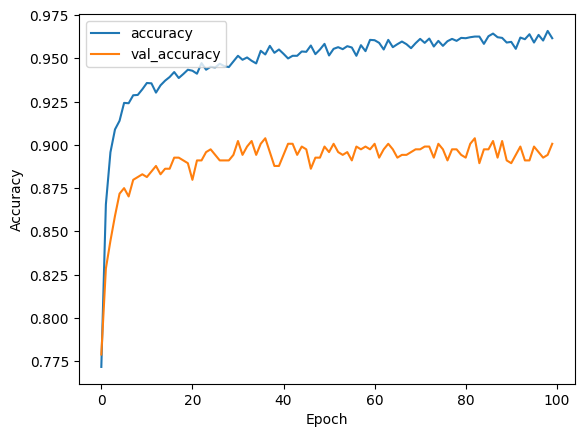

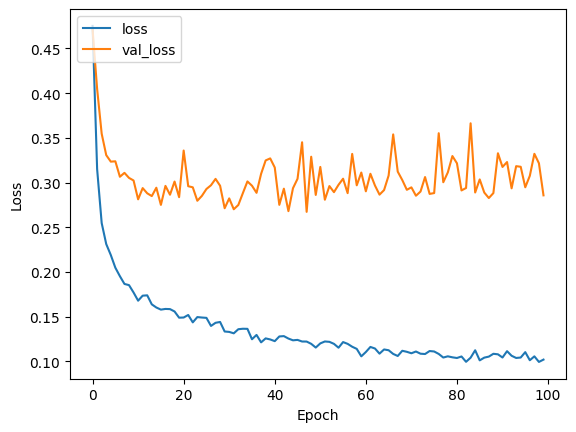

In [ ]:
import matplotlib.pyplot as plt

# Courbes d'entraînement
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.show()

# Courbes de perte
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')
plt.show()

In [ ]:
#resnet101_model
from tensorflow.keras.applications import ResNet101
# Charger ResNet101 sans la top layer
base_model = ResNet101(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # On gèle ResNet50

# Construire le modèle avec API fonctionnelle
inputs = tf.keras.Input(shape=(224, 224, 3))
x = base_model(inputs, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation='sigmoid')(x)

modelresnet = models.Model(inputs, outputs)

# Compiler
modelresnet.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

modelresnet.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 resnet101 (Functional)      (None, 7, 7, 2048)        42658176  
                                                                 
 global_average_pooling2d_2   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_4 (Dense)             (None, 256)               524544    
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 1)                 257       
                                                           

In [ ]:
history = modelresnet.fit(
    train_generator,
    epochs=100,
    validation_data=test_generator
)

Epoch 1/100
652/652 [==============================] - 145s 210ms/step - loss: 0.5658 - accuracy: 0.7335 - val_loss: 0.5936 - val_accuracy: 0.6362
Epoch 2/100
652/652 [==============================] - 125s 191ms/step - loss: 0.4858 - accuracy: 0.7552 - val_loss: 0.5484 - val_accuracy: 0.6827
Epoch 3/100
652/652 [==============================] - 124s 190ms/step - loss: 0.4432 - accuracy: 0.7822 - val_loss: 0.5540 - val_accuracy: 0.6571
Epoch 4/100
652/652 [==============================] - 129s 197ms/step - loss: 0.4124 - accuracy: 0.8008 - val_loss: 0.5120 - val_accuracy: 0.7212
Epoch 5/100
652/652 [==============================] - 124s 190ms/step - loss: 0.3870 - accuracy: 0.8146 - val_loss: 0.5114 - val_accuracy: 0.7147
Epoch 6/100
652/652 [==============================] - 138s 211ms/step - loss: 0.3674 - accuracy: 0.8244 - val_loss: 0.4668 - val_accuracy: 0.7692
Epoch 7/100
652/652 [==============================] - 126s 194ms/step - loss: 0.3528 - accuracy: 0.8347 - val_loss: 0

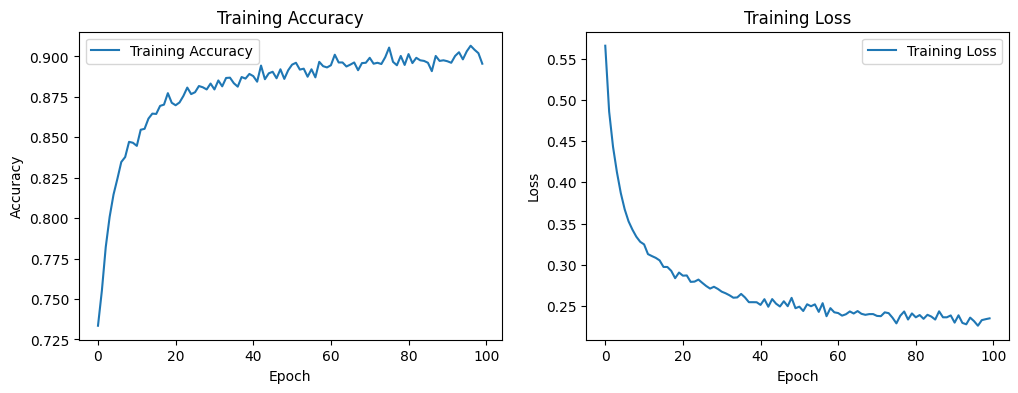

In [ ]:
def plot_training_history(history):
    # Accuracy
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.title('Training Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.title('Training Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

plot_training_history(history)

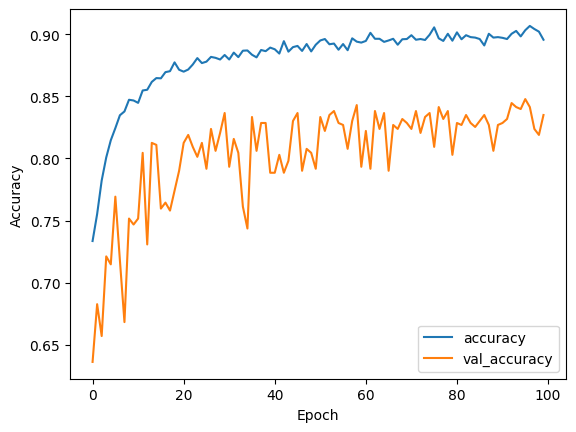

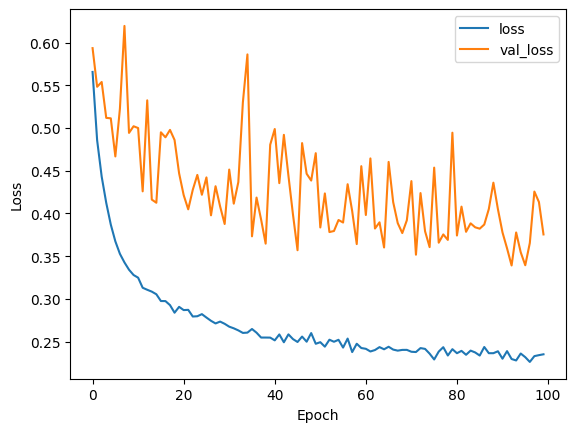

In [ ]:
import matplotlib.pyplot as plt

# Courbes d'entraînement


plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Courbes de perte
 # Loss

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
model.save('modelvgg16.h5')

In [ ]:
model.save('modelresnet.h5')

In [ ]:
#stacking_technique
import tensorflow as tf
from tensorflow.keras.models import load_model, Model
from tensorflow.keras.layers import Input, Concatenate, Dense, Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import BatchNormalization

# Chemins vers les modèles pré-entraînés
vgg16_model = load_model('modelvgg16.h5')
resnet101_model = load_model('modelresnet.h5')
densenet201_model = load_model('model.h5')

# On suppose que chaque modèle a une couche finale de classification qu'on ne veut pas utiliser ici
# On les remplace par la sortie avant classification (par exemple la dernière couche dense ou pooling)
vgg16_features = Model(inputs=vgg16_model.input, outputs=vgg16_model.layers[-2].output)
resnet101_features = Model(inputs=resnet101_model.input, outputs=resnet101_model.layers[-2].output)
densenet201_features = Model(inputs=densenet201_model.input, outputs=densenet201_model.layers[-2].output)

# Geler les modèles de base (optionnel)
vgg16_features.trainable = False
resnet101_features.trainable = False
densenet201_features.trainable = False

# Input commun
input_layer = Input(shape=(224, 224, 3))  # à adapter selon ton preprocessing

# Obtenir les features
vgg_output = vgg16_features(input_layer)
resnet_output = resnet101_features(input_layer)
densenet_output = densenet201_features(input_layer)

# Combiner les features
combined = Concatenate()([vgg_output, resnet_output, densenet_output])

# Meta-classifier
x = Dropout(0.5)(combined)
x = Dense(512, activation='relu')(x)
x = Dropout(0.3)(x)
output = Dense(1, activation='sigmoid')(x)


# Modèle final
stacked_model = Model(inputs=input_layer, outputs=output)

# Compilation
stacked_model.compile(optimizer=SGD(learning_rate=1e-4), loss='binary_crossentropy', metrics=['accuracy'])
stacked_model.summary()

Model: "model_16"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_8 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 model_13 (Functional)          (None, 256)          18813760    ['input_8[0][0]']                
                                                                                                  
 model_14 (Functional)          (None, 256)          18813760    ['input_8[0][0]']                
                                                                                                  
 model_15 (Functional)          (None, 256)          18813760    ['input_8[0][0]']         

In [ ]:
history1 = stacked_model.fit(
    train_generator,
    epochs=100,
    validation_data=test_generator,

)


Epoch 1/100
652/652 [==============================] - 178s 241ms/step - loss: 0.5267 - accuracy: 0.7258 - val_loss: 0.4185 - val_accuracy: 0.7292
Epoch 2/100
652/652 [==============================] - 142s 218ms/step - loss: 0.3393 - accuracy: 0.8382 - val_loss: 0.3394 - val_accuracy: 0.8253
Epoch 3/100
652/652 [==============================] - 146s 224ms/step - loss: 0.2572 - accuracy: 0.8898 - val_loss: 0.2982 - val_accuracy: 0.8686
Epoch 4/100
652/652 [==============================] - 140s 214ms/step - loss: 0.2130 - accuracy: 0.9158 - val_loss: 0.2742 - val_accuracy: 0.8782
Epoch 5/100
652/652 [==============================] - 142s 217ms/step - loss: 0.1814 - accuracy: 0.9317 - val_loss: 0.2618 - val_accuracy: 0.8894
Epoch 6/100
652/652 [==============================] - 143s 219ms/step - loss: 0.1643 - accuracy: 0.9434 - val_loss: 0.2516 - val_accuracy: 0.8974
Epoch 7/100
652/652 [==============================] - 143s 219ms/step - loss: 0.1538 - accuracy: 0.9427 - val_loss: 0

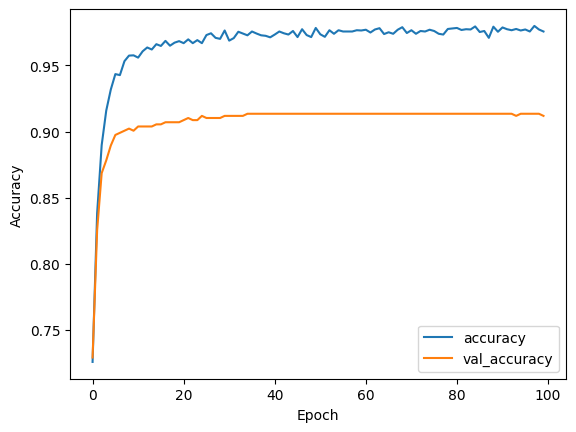

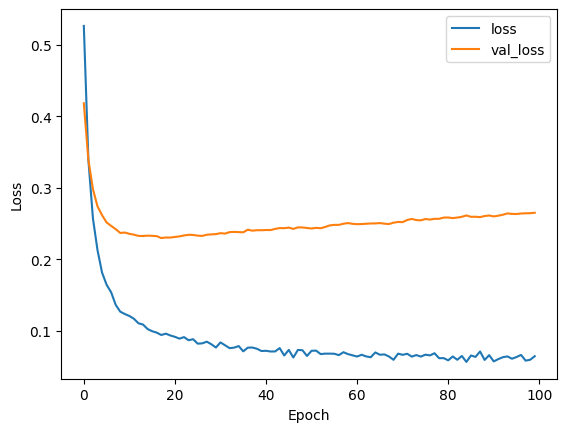

In [ ]:
import matplotlib.pyplot as plt

# Courbes d'entraînement


plt.plot(history1.history['accuracy'], label='accuracy')
plt.plot(history1.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Courbes de perte
 # Loss

plt.plot(history1.history['loss'], label='loss')
plt.plot(history1.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
import sys

import tensorflow.keras
import tensorflow as tf

print(f"Tensor Flow Version: {tf.__version__}")
print(f"Keras Version: {tensorflow.keras.__version__}")
print(f"Python {sys.version}")
print("GPU is", "available" if tf.test.is_gpu_available() else "NOT AVAILABLE")
print(tf.config.list_physical_devices('GPU'))

In [ ]:
model.save('modelvgg16.h5')
model.save('model.h5')
model.save('modelresnet.h5')

In [ ]:
!pip install seaborn


   ---------------------------------------- 0.0/10.8 MB ? eta -:--:--
   ---------------------------- ----------- 7.6/10.8 MB 39.0 MB/s eta 0:00:01
   ---------------------------------------- 10.8/10.8 MB 32.1 MB/s eta 0:00:00


Meilleur seuil trouvé : 0.30 avec un F1 score de 0.7591

Accuracy soft voting pondéré: 0.6186

Rapport de classification :
              precision    recall  f1-score   support

           0       0.42      0.05      0.08       234
           1       0.63      0.96      0.76       390

    accuracy                           0.62       624
   macro avg       0.53      0.50      0.42       624
weighted avg       0.55      0.62      0.51       624



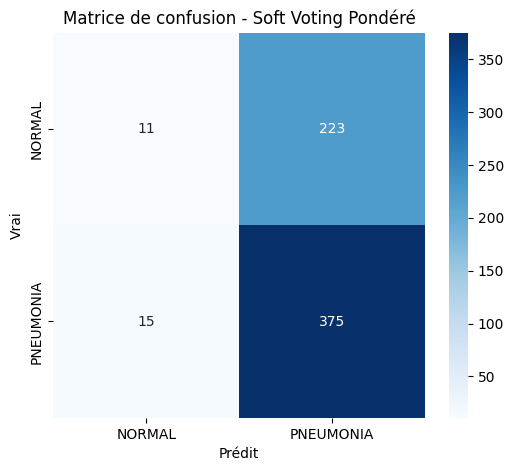

In [ ]:
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Charger les modèles (chemins à adapter)
model_vgg16 = load_model('modelvgg16.h5')
model_resnet101 = load_model('modelresnet.h5')
model_densenet201 = load_model('model.h5')

models = [model_vgg19, model_resnet50, model_densenet201]

# Exemple de poids, basés sur la performance individuelle estimée (à ajuster)
weights = [0.9, 0.85, 0.95]  # DenseNet201, VGG19, ResNet50 (par exemple)

# Assure-toi que test_generator est défini avec shuffle=False
# test_generator = ...

# Prédictions pour chaque modèle
predictions = [model.predict(test_generator, verbose=0) for model in models]

# Moyenne pondérée des prédictions (Soft Voting Pondéré)
avg_pred = np.average(predictions, axis=0, weights=weights)

# Récupérer les vraies étiquettes
true_labels = test_generator.classes

# Optimisation du seuil (pour classification binaire)
if avg_pred.shape[1] == 1:
    best_thresh = 0.5
    best_f1 = 0
    for thresh in np.arange(0.3, 0.7, 0.01):
        preds_thresh = (avg_pred > thresh).astype(int).flatten()
        f1 = f1_score(true_labels, preds_thresh)
        if f1 > best_f1:
            best_f1 = f1
            best_thresh = thresh

    print(f"Meilleur seuil trouvé : {best_thresh:.2f} avec un F1 score de {best_f1:.4f}")
    predicted_labels = (avg_pred > best_thresh).astype(int).flatten()
else:
    # Multi-classe : prendre la classe max
    predicted_labels = np.argmax(avg_pred, axis=1)

# Accuracy
accuracy = accuracy_score(true_labels, predicted_labels)
print(f"\nAccuracy soft voting pondéré: {accuracy:.4f}")

# Rapport classification
print("\nRapport de classification :")
print(classification_report(true_labels, predicted_labels))

# Matrice de confusion
cm = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=test_generator.class_indices.keys(),
            yticklabels=test_generator.class_indices.keys())
plt.xlabel("Prédit")
plt.ylabel("Vrai")
plt.title("Matrice de confusion - Soft Voting Pondéré")
plt.show()
